## MLE Linear Regression

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math

### **Least Squares**

The more well known method for finding linear regression coefficients is called **least squares**.

Let $\mathbf{X}$ be our (tall) features matrix of size \{$m \times n$\}, $m > n$, and $\mathbf{y}$ the vector containing the target variables of dimension $m$, we assume a linear relationship between them.

Let $\mathbf{\tilde{X}} := (\mathbf{X}\;|\;\mathbf{\vec{1}})$, the augmented \{$m \times (n+1)$\} matrix, using it instead of the original $\mathbf{X}$ will prevent us from having to use an additional vector for storing the bias terms.

Then, we want to find a vector of coeficients $\mathbf{w}$ such that $$\mathbf{\tilde{X}w} = \mathbf{y}$$

In practice, this is impossible since $\mathbf{y}$ will always be measured with some noise $\vec{\epsilon}$: $$\mathbf{\tilde{X}w} + \vec{\epsilon} = \mathbf{y}$$ 

We find the solution for $\mathbf{w}$ by minimizing the sum of squared errors $||\vec{\epsilon}||^2 = ||\mathbf{\tilde{X}w - \mathbf{{y}}}||^2$ $$\frac{\partial}{\partial \mathbf{w}} ||\mathbf{\tilde{X}w - \mathbf{{y}}}||^2 = 0$$
$$2\mathbf{\tilde{X}}^T(\mathbf{\tilde{X}w} - \mathbf{{y}}) = 0$$
$$(\mathbf{\tilde{X}}^T\mathbf{\tilde{X}})^{-1} \mathbf{\tilde{X}}^T \mathbf{{y}} = \mathbf{w}$$

#### **Implementation:**

w0 = 4, w1 = 3


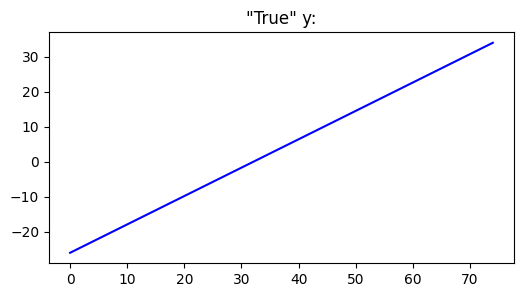

In [27]:
# defining our linear relationship

n = 75 # number of data points

x = np.linspace(-10, 10, n)

w0, w1 = np.random.randint(1, 5, 2)

print(f'w0 = {w0}, w1 = {w1}')

y = w0 + (w1 * x)

plt.figure(figsize=(6, 3))
plt.plot(list(range(n)), y, color='blue')
plt.title('"True" y:'); None

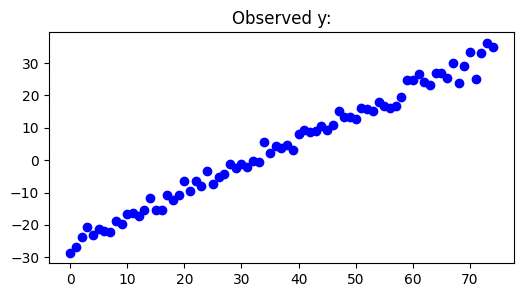

In [28]:
# adding (normally distributed) noise 

noise = np.random.normal(size=n, scale=2)
y += noise

plt.figure(figsize=(6, 3))
plt.scatter(list(range(n)), y, color='blue')
plt.title('Observed y:'); None

In [29]:
# augmenting X

X = np.array([x, np.ones(n)]).T
X.shape

(75, 2)

In [30]:
def least_squares(X, y):
    assert X.shape[0] == len(y)
    # least squares formula, using the Moore-Penrose pseudo-inverse
    return np.linalg.pinv(X.T @ X) @ X.T @ y

w_ls = least_squares(X, y)
print(f'coefs: w1 ~= {w_ls[0]:.1f}, w0 ~= {w_ls[1]:.1f}')

coefs: w1 ~= 3.0, w0 ~= 4.0


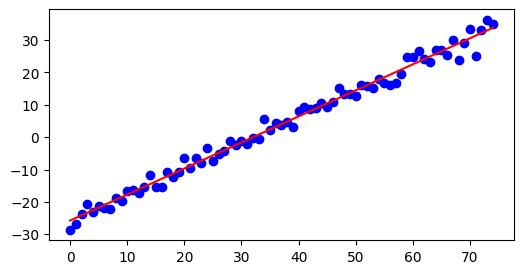

In [31]:
preds_ls = X @ w_ls

plt.figure(figsize=(6, 3))
plt.plot(list(range(n)), preds_ls, color='red')
plt.scatter(list(range(n)), y, color='blue')
plt.show()

### **Maximum Likelihood Estimation**

Lets' now see how we can derive the exact same formula starting from a probabilistic perspective.

The method we are going to use here is based on **estimating the parameters of a continuous probability distribution**, namely the **Gaussian (Normal) distribution**.

It's probability density function (PDF) is given by:
$$\mathcal{N}(x | \mu, \sigma^2) = \frac{ \exp{(\frac{(x-\mu)^2}{2\sigma^2})} }{\sqrt{2\pi\sigma^2}}$$

Assume a data set consisting of a vector of $N$ observations $\mathbf{x}$ i.i.d (independently and identically distributed) of some random variable $X \sim \mathcal{N}(\mu, \sigma^2)$, we can then write the **probability of the data set (likelihood function)** to be
$$p(\mathbf{x} | \mu, \sigma^2) = \prod_{i=1}^{N} \mathcal{N}(x_i | \mu, \sigma^2)$$

*Note that here instead of working with a matrix of $m$ features, we start with observations of a single feature $x$ for simplicity. We will generalize later.*

Finding the parameters that maximize this product is what we call **Maximum Likelihood Estimation**.

In the context of linear regression, we will assume that given $\mathbf{x}$, the target vector $\mathbf{y}$ has a Gaussian distribution with, for each $x_i$, the corresponding mean given by $$\mu_i = f(x_i, \mathbf{w}) = w_0 + x_iw_1$$ 

Finding $\mathbf{w}$ would allow us to make predictions on unseen data, just as for Least Squares. 

Therefore, we are looking for $\mathbf{w}$ that **maximize**
$$p(\mathbf{y} | \mathbf{x}, \mathbf{w}, \sigma^2) = \prod_{i=1}^{N} \mathcal{N}(y_i | f(x_i, \mathbf{w}), \sigma^2)$$

for some fixed $\sigma^2$.

To find these parameters, it is easier to work with the logarithm of the MLE:

$$\ln p(\mathbf{y} | \mathbf{x}, \mathbf{w}, \sigma^2) = \frac{-1}{2\sigma^2} \sum^{N}_{i = 1} \Bigl(f(x_i, \mathbf{w}) - y_i\Bigr)^2 - \frac{N}{2}\ln(\sigma^2) - \frac{N}{2} \ln(2\pi)$$

We see that finding the MLE solution for $\mathbf{w}$, that we will call $\mathbf{w_ml}$, simplifies to maximizing $$\frac{-1}{2}\sum_{i=1}^{N}\Bigl( (w_0 + x_iw_1) - y_i \Bigr)^2$$
or minimizing $$L = \frac{1}{2}\sum_{i=1}^{N}\Bigl( y_i - (w_0 + x_iw_1) \Bigr)^2$$

Once again, we see that **we are minimizing the sum of squared errors**.

Taking the derivative with respect to $w_0$:
$$
\frac{\partial L}{\partial w_0} = \frac{1}{2} \sum_{i = 1}^{N} \frac{\partial}{\partial w_0} \Bigl( y_i - (w_0 + x_iw_1) \Bigr)^2 =  \sum_{i = 1}^{N} y_i - (w_0 + x_iw_1)
$$

To minimize with respect to $w_0$, we set the derivative equal to $0$:

$$
\frac{\partial L}{\partial w_0} = 0
$$
$$
\sum_{i = 1}^{N} y_i - (w_0 + x_iw_1) = 0
$$
$$
-Nw_0  = - \sum_{i = 1}^{N} x_iw_1 - \sum_{i = 1}^{N}y_i
$$
$$
Nw_0  = \sum_{i = 1}^{N}y_i - w_1\sum_{i = 1}^{N}x_i
$$
$$
w_0  = \frac{1}{N} \Bigl(\sum_{i = 1}^{N}y_i - w_1\sum_{i = 1}^{N}x_i \Bigr) = \bar{\mathbf{y}} - w_1\bar{\mathbf{x}}$$

Where $\bar{\mathbf{v}}$ denotes the mean over the values of some vector $\mathbf{v}$.

Repeating the same process for $w_1$ we get
$$
\frac{\partial L}{\partial w_1} = -\sum_{i = 1}^{N} x_i\bigl(y_i - (w_0 + x_iw_1)\bigr)
$$
$$
-\sum_{i = 1}^{N} x_iy_i - x_iw_0 - x_i^2w_1 = 0
$$
$$
w_0 \sum_{i = 1}^{N} x_i + w_1 \sum_{i = 1}^{N} x_i^2 = \sum_{i = 1}^{N} x_iy_i
$$
Plugging in our previous solution for $w_0$:
$$
(\bar{\mathbf{y}} - w_1\bar{\mathbf{x}}) N\bar{\mathbf{x}} + w_1 \sum_{i = 1}^{N} x_i^2 = \sum_{i = 1}^{N} x_iy_i
$$
$$
N\bar{\mathbf{y}}\bar{\mathbf{x}} - w_1N\bar{\mathbf{x}}^2 + w_1 \sum_{i = 1}^{N} x_i^2 = \sum_{i = 1}^{N} x_iy_i
$$
$$
-w_1N\bar{\mathbf{x}}^2 + w_1 \sum_{i = 1}^{N} x_i^2 = \sum_{i = 1}^{N} x_iy_i - N\bar{\mathbf{y}}\bar{\mathbf{x}}
$$
$$
w_1(-N\bar{\mathbf{x}}^2 + \sum_{i = 1}^{N} x_i^2) = \sum_{i = 1}^{N} x_iy_i - N\bar{\mathbf{y}}\bar{\mathbf{x}}
$$
$$
w_1 = \frac{\sum_{i = 1}^{N} (x_i - \bar{\mathbf{x}})(y_i - \bar{\mathbf{y}})}{\sum_{i = 1}^{N} (x_i - \bar{\mathbf{x}})^2}
$$

Giving us our final solution for $\mathbf{w_{ml}}$ and we see that is exactly the [simple linear regression formula](https://en.wikipedia.org/wiki/Ordinary_least_squares#Simple_linear_regression_model).

Now note that if we would generalize to $m$ features instead of one, that is, the probability of $y_i \in \mathbf{y}$ is given by $p(y_i | \mathbf{x}, \mathbf{w},  \sigma^2)$ and $p(\mathbf{y}) = p(\mathbf{y} | \mathbf{X}, \mathbf{w},  \sigma^2)$, we would have the exact same formula as the one we derived for the least squares method.

Let's just show that the solution derived for $\mathbf{w_ml}$ here is equivalent to our Least Squares example with a single feature $x$.

In [32]:
def get_w_ml(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    w1 = sum([(xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y)])
    w1 /= sum([(xi - mean_x)**2 for xi in x])

    w0 = mean_y - (w1 * mean_x)

    return w0, w1

In [33]:
w0, w1 = get_w_ml(x, y)

preds = x * w1 + w0

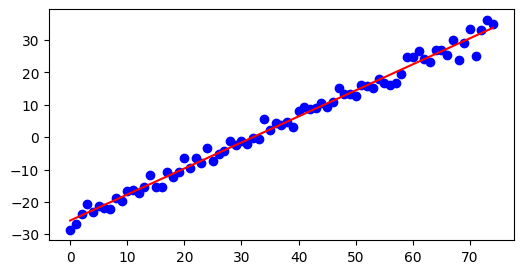

In [34]:
plt.figure(figsize=(6, 3))
plt.plot(list(range(n)), preds, color='red')
plt.scatter(list(range(n)), y, color='blue')
plt.show()

**We effectively get the same linear regression coefficients.**